In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain


# Load datasets
description_df = pd.read_csv('../dataset/description.csv')
medications_df = pd.read_csv('../dataset/medications.csv')
symptoms_df = pd.read_csv('../dataset/symptoms_df.csv')


In [147]:
description_df.describe()


,Disease,Description
count,41,41
unique,41,41
top,Fungal infection,Fungal infection is a common skin condition ca...
freq,1,1


In [148]:
medications_df.describe()

,Disease,Medication
count,41,41
unique,41,38
top,Fungal infection,"['Antiviral drugs', 'IV fluids', 'Blood transf..."
freq,1,3


In [149]:
symptoms_df.describe()

,Unnamed: 0
count,4920.000000
mean,2459.500000
std,1420.425992
min,0.000000
25%,1229.750000
50%,2459.500000
75%,3689.250000
max,4919.000000


In [150]:
medications_df.head()

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."


In [151]:
symptoms_df.head()

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN


In [152]:
# Standardize disease names
description_df['Disease'] = description_df['Disease'].str.lower().str.strip()
medications_df['Disease'] = medications_df['Disease'].str.lower().str.strip()
symptoms_df['Disease'] = symptoms_df['Disease'].str.lower().str.strip()


In [153]:
description_df.isnull().sum()


Disease        0
Description    0
dtype: int64

In [154]:
medications_df.isnull().sum()


Disease       0
Medication    0
dtype: int64

In [155]:
symptoms_df.isnull().sum()

Unnamed: 0      0
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
dtype: int64

In [156]:
# Merge datasets
merged_df = symptoms_df.merge(medications_df, on='Disease', how='inner')
merged_df = merged_df.merge(description_df, on='Disease', how='inner')


In [157]:
merged_df.head(10)

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Medication,Description
0,0,fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,"['Antifungal Cream', 'Fluconazole', 'Terbinafi...",Fungal infection is a common skin condition ca...
1,1,fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,"['Antifungal Cream', 'Fluconazole', 'Terbinafi...",Fungal infection is a common skin condition ca...
2,2,fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,"['Antifungal Cream', 'Fluconazole', 'Terbinafi...",Fungal infection is a common skin condition ca...
3,3,fungal infection,itching,skin_rash,dischromic _patches,NaN,"['Antifungal Cream', 'Fluconazole', 'Terbinafi...",Fungal infection is a common skin condition ca...
4,4,fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,"['Antifungal Cream', 'Fluconazole', 'Terbinafi...",Fungal infection is a common skin condition ca...
5,5,fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,"['Antifungal Cream', 'Fluconazole', 'Terbinafi...",Fungal infection is a common skin condition ca...
6,6,fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,"['Antifungal Cream', 'Fluconazole', 'Terbinafi...",Fungal infection is a common skin condition ca...
7,7,fungal infection,itching,skin_rash,dischromic _patches,NaN,"['Antifungal Cream', 'Fluconazole', 'Terbinafi...",Fungal infection is a common skin condition ca...
8,8,fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,"['Antifungal Cream', 'Fluconazole', 'Terbinafi...",Fungal infection is a common skin condition ca...
9,9,fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,"['Antifungal Cream', 'Fluconazole', 'Terbinafi...",Fungal infection is a common skin condition ca...


In [158]:
# Save cleaned dataset
merged_df.to_csv('processed_dataset.csv', index=False)


In [159]:
# Check the shape of the dataset

merged_df.describe()



,Unnamed: 0
count,4680.000000
mean,2459.358974
std,1420.441691
min,0.000000
25%,1229.750000
50%,2459.500000
75%,3689.250000
max,4919.000000


In [160]:
# Column-wise non-null counts and data types
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4680 entries, 0 to 4679
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   4680 non-null   int64 
 1   Disease      4680 non-null   object
 2   Symptom_1    4680 non-null   object
 3   Symptom_2    4680 non-null   object
 4   Symptom_3    4680 non-null   object
 5   Symptom_4    4332 non-null   object
 6   Medication   4680 non-null   object
 7   Description  4680 non-null   object
dtypes: int64(1), object(7)
memory usage: 292.6+ KB


In [161]:

# View the first few rows
merged_df.head()

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Medication,Description
0,0,fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,"['Antifungal Cream', 'Fluconazole', 'Terbinafi...",Fungal infection is a common skin condition ca...
1,1,fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,"['Antifungal Cream', 'Fluconazole', 'Terbinafi...",Fungal infection is a common skin condition ca...
2,2,fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,"['Antifungal Cream', 'Fluconazole', 'Terbinafi...",Fungal infection is a common skin condition ca...
3,3,fungal infection,itching,skin_rash,dischromic _patches,NaN,"['Antifungal Cream', 'Fluconazole', 'Terbinafi...",Fungal infection is a common skin condition ca...
4,4,fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,"['Antifungal Cream', 'Fluconazole', 'Terbinafi...",Fungal infection is a common skin condition ca...


In [162]:
print(merged_df['Medication'].head())
print(type(merged_df['Medication'].iloc[0]))  # Check the type of an individual cell


0    ['Antifungal Cream', 'Fluconazole', 'Terbinafi...
1    ['Antifungal Cream', 'Fluconazole', 'Terbinafi...
2    ['Antifungal Cream', 'Fluconazole', 'Terbinafi...
3    ['Antifungal Cream', 'Fluconazole', 'Terbinafi...
4    ['Antifungal Cream', 'Fluconazole', 'Terbinafi...
Name: Medication, dtype: object
<class 'str'>


In [163]:
# Frequency of diseases
disease_counts = merged_df['Disease'].value_counts()
disease_counts

Disease
fungal infection                120
allergy                         120
gerd                            120
chronic cholestasis             120
drug reaction                   120
aids                            120
diabetes                        120
gastroenteritis                 120
bronchial asthma                120
hypertension                    120
migraine                        120
cervical spondylosis            120
paralysis (brain hemorrhage)    120
jaundice                        120
malaria                         120
chicken pox                     120
dengue                          120
typhoid                         120
hepatitis a                     120
hepatitis b                     120
hepatitis c                     120
hepatitis d                     120
hepatitis e                     120
alcoholic hepatitis             120
tuberculosis                    120
common cold                     120
pneumonia                       120
dimorphic hemmorhoid

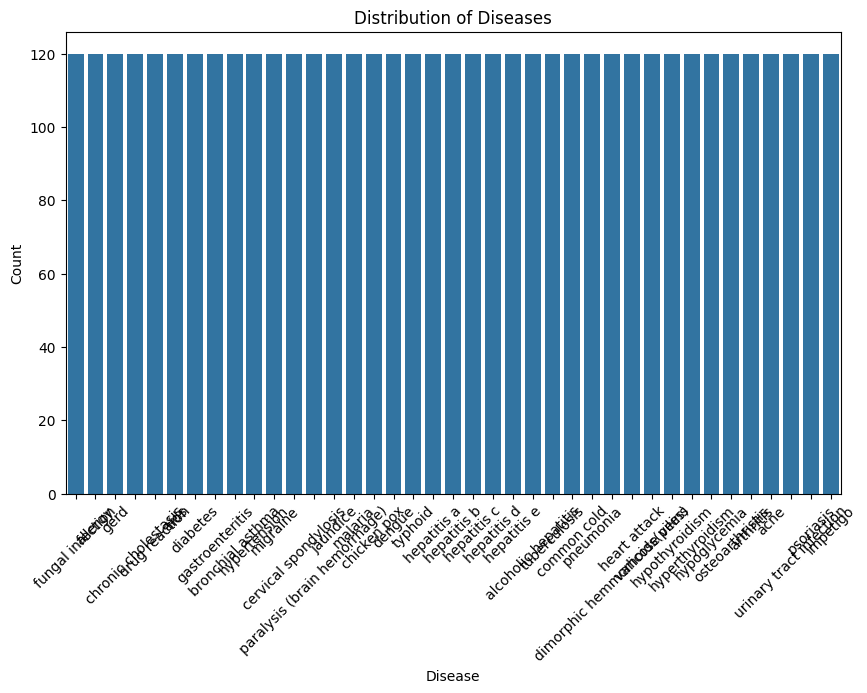

In [164]:
plt.figure(figsize=(10, 6))
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.title("Distribution of Diseases")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [165]:
import ast

# Convert strings to lists
merged_df['Medication'] = merged_df['Medication'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [166]:
# Frequency of medications (flatten if they are lists)

all_medications = list(chain.from_iterable(merged_df['Medication']))
medication_counts = pd.Series(all_medications).value_counts()

medication_counts

IV fluids              1440
Corticosteroids        1080
Antibiotics             960
Liver transplant        960
Blood transfusions      960
                       ... 
Topical antibiotics     120
Oral antibiotics        120
Antiseptics             120
Ointments               120
Warm compresses         120
Name: count, Length: 117, dtype: int64

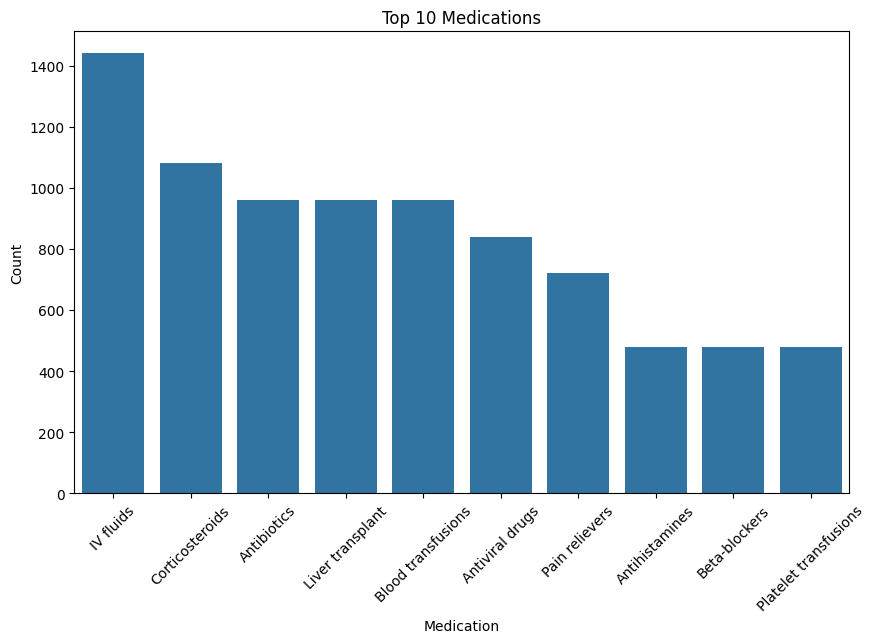

In [167]:
# Plot top medications
plt.figure(figsize=(10, 6))
sns.barplot(x=medication_counts[:10].index, y=medication_counts[:10].values)
plt.title("Top 10 Medications")
plt.xlabel("Medication")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

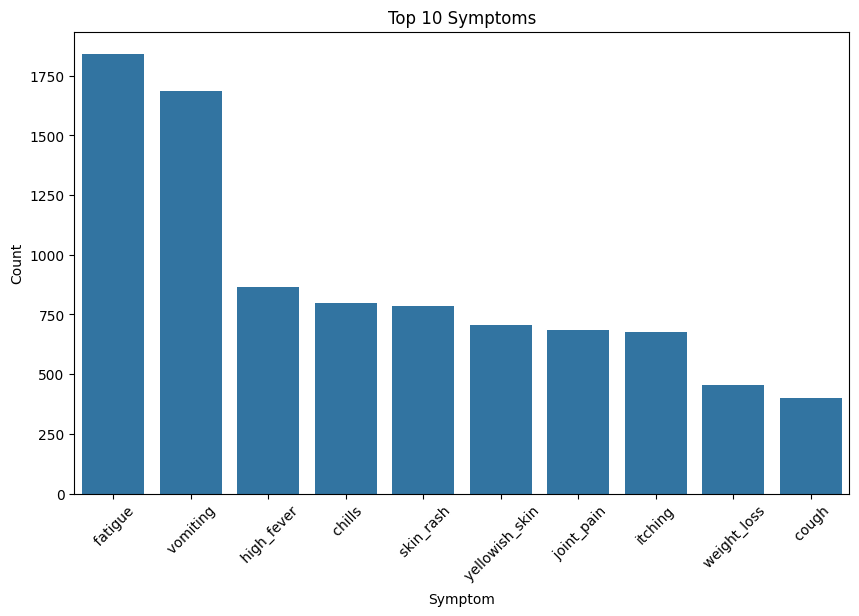

In [168]:
# Aggregate symptoms into a single column
symptoms_columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4']
all_symptoms = merged_df[symptoms_columns].apply(lambda x: ', '.join(x.dropna()), axis=1)

# Count occurrences of each symptom
from collections import Counter

symptom_counts = Counter(', '.join(all_symptoms).split(', '))

# Plot top symptoms
symptom_counts_df = pd.DataFrame(symptom_counts.items(), columns=['Symptom', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=symptom_counts_df[:10]['Symptom'], y=symptom_counts_df[:10]['Count'])
plt.title("Top 10 Symptoms")
plt.xlabel("Symptom")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


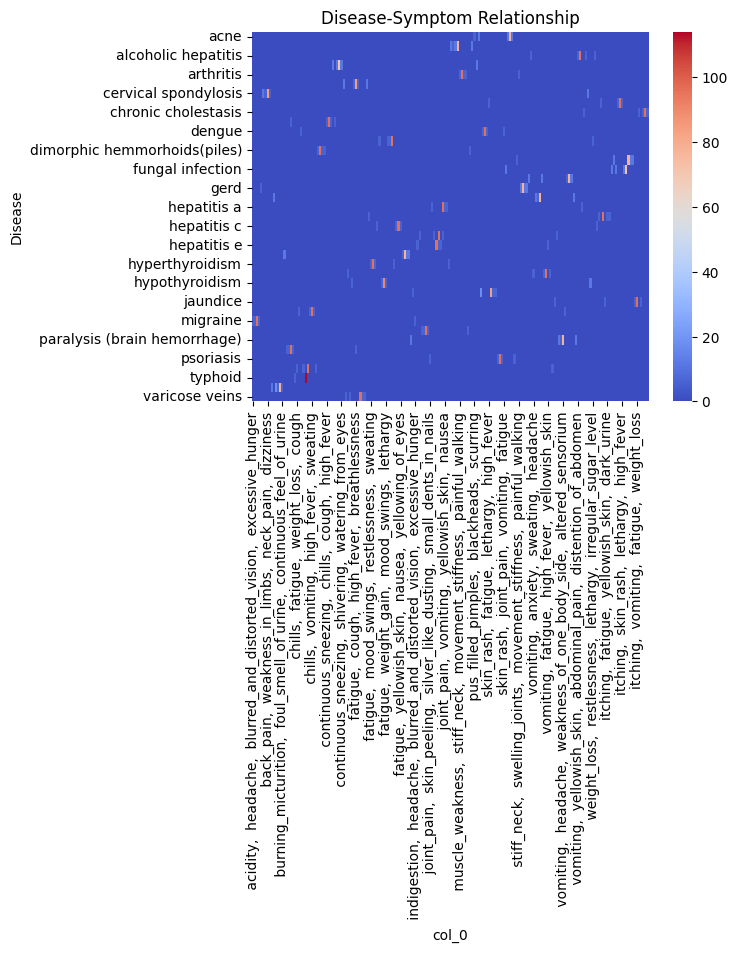

In [169]:
# Heatmap of diseases and symptoms
disease_symptom_matrix = pd.crosstab(merged_df['Disease'], all_symptoms)
sns.heatmap(disease_symptom_matrix, cmap='coolwarm', annot=False)
plt.title("Disease-Symptom Relationship")
plt.show()


In [178]:
from sklearn.preprocessing import MultiLabelBinarizer

# Combine symptoms into a list for each disease
merged_df['All_Symptoms'] = merged_df[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4']].values.tolist()





In [179]:
# Remove missing symptoms
merged_df['All_Symptoms'] = merged_df['All_Symptoms'].apply(
    lambda x: [symptom for symptom in x if pd.notna(symptom)]
)

# One-hot encode symptoms
mlb = MultiLabelBinarizer()
symptoms_encoded = mlb.fit_transform(merged_df['All_Symptoms'])

# Create a DataFrame for the encoded symptoms
symptoms_df = pd.DataFrame(symptoms_encoded, columns=mlb.classes_)



In [180]:
# Merge encoded symptoms with disease column
final_df = pd.concat([merged_df['Disease'], symptoms_df], axis=1)

# Features (X) and target (y)
X = final_df.drop(columns=['Disease'])
y = final_df['Disease']


In [181]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Example: Using RandomForest for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(20).index
X = X[top_features]


In [183]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [184]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [185]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8354700854700855
                              precision    recall  f1-score   support

                        acne       0.92      0.92      0.92        25
                        aids       0.96      0.92      0.94        24
         alcoholic hepatitis       1.00      0.96      0.98        24
                     allergy       1.00      1.00      1.00        28
                   arthritis       0.00      0.00      0.00        25
            bronchial asthma       0.96      1.00      0.98        25
        cervical spondylosis       0.00      0.00      0.00        32
                 chicken pox       1.00      1.00      1.00        20
         chronic cholestasis       1.00      0.95      0.98        21
                 common cold       1.00      0.88      0.94        25
                      dengue       1.00      1.00      1.00        25
                    diabetes       1.00      1.00      1.00        22
dimorphic hemmorhoids(piles)       0.00      0.00      0.00 

D:\Code\ia\flaskProjectdrugRecomFlaskAPI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Code\ia\flaskProjectdrugRecomFlaskAPI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Code\ia\flaskProjectdrugRecomFlaskAPI\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [186]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_


In [190]:
import joblib

joblib.dump(model, 'disease_prediction_model.pkl')


['disease_prediction_model.pkl']

In [188]:
# Make predictions using the test set (X_test)
y_pred = model.predict(X_test)



In [198]:
# Example symptoms input
test_symptoms = [' high_fever', ' vomiting', ' chills', ' fatigue']

# Encode the symptoms (ensure it matches the format used in training)
test_encoded = pd.DataFrame(mlb.transform([test_symptoms]), columns=mlb.classes_)

# Align the columns of the test data with the training data
# Reindex the columns to match the training data (X_train.columns)
test_encoded = test_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict the disease
predicted_disease = model.predict(test_encoded)
print("Predicted Disease:", predicted_disease[0])



Predicted Disease: typhoid


In [199]:
#show
print("Predicted")

Predicted
